# NetworKit for large-scale networks analysis

## Comparison of networKit and networkx

In [1]:
import networkx as nx
import networkit as nk
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import pandas as pd

In [ ]:
%load_ext autotime

In [7]:
g = nk.generators.HyperbolicGenerator(5000000).generate()


time: 3.16 s (started: 2024-10-15 09:53:37 +03:00)


In [8]:
G = nk.nxadapter.nk2nx(g)

time: 28.5 s (started: 2024-10-15 09:53:40 +03:00)


In [10]:
nc=nx.number_connected_components(G)
print("Number of connected components", nc)

Number of connected components 204909
time: 3.49 s (started: 2024-10-15 09:54:12 +03:00)


In [11]:
cc = nk.components.ConnectedComponents(g)
cc.run()
print("Number of connected components", cc.numberOfComponents())

Number of connected components 204909
time: 357 ms (started: 2024-10-15 09:54:15 +03:00)


In [12]:
largest_cc = max(nx.connected_components(G), key=len)
print("Size of largest component", len(largest_cc))

Size of largest component 3200778
time: 3.5 s (started: 2024-10-15 09:54:16 +03:00)


In [13]:
sortedDict = sorted(cc.getComponentSizes())
print(sortedDict[0])
scc=cc.getComponentSizes()
print("Size of largest component", scc[0])

0
Size of largest component 51
time: 372 ms (started: 2024-10-15 09:54:19 +03:00)


In [14]:
nk.globals.clustering(g)

0.7822895856857466

time: 27 ms (started: 2024-10-15 09:54:20 +03:00)


In [15]:
nx.average_clustering(G)

0.7180866565726463

time: 1min 21s (started: 2024-10-15 09:54:20 +03:00)


# Network diameter

In [16]:
newGraph = nk.components.ConnectedComponents.extractLargestConnectedComponent(g, True)
newGraph.numberOfNodes()

3200778

time: 2.94 s (started: 2024-10-15 09:57:13 +03:00)


In [ ]:
diam = nk.distance.Diameter(newGraph,algo=1)
diam.run()
print("Network diameter", diam.getDiameter())

Network diameter (64, 0)
time: 3.59 s (started: 2024-10-09 17:39:09 +00:00)


In [ ]:
newG=G.subgraph(largest_cc)

time: 467 ms (started: 2024-10-09 17:39:13 +00:00)


In [ ]:
r = nx.degree_assortativity_coefficient(G)
print('Assortativity index of network is ', r)

Assortativity index of network is  -0.0011905012357756998
time: 1min 5s (started: 2024-10-09 17:41:27 +00:00)


In [ ]:
dd = nk.centrality.DegreeCentrality(g).run().scores()
assor=nk.correlation.Assortativity(g,dd)
assor.run()
print("Assorativity index", assor.getCoefficient())

Assorativity index -0.0011904982077892304
time: 951 ms (started: 2024-10-09 17:58:28 +00:00)


# Analysis of real network
**Stanford Large Network Dataset Collection**
https://snap.stanford.edu/data/

## LiveJournal social network and ground-truth communities
LiveJournal is a free on-line blogging community where users declare friendship each other. LiveJournal also allows users form a group which other members can then join. We consider such user-defined groups as ground-truth communities. We provide the LiveJournal friendship social network and ground-truth communities.

In [17]:
df=pd.read_csv("LiveJournal_edges.csv", sep=",")

time: 3.72 s (started: 2024-10-15 09:57:54 +03:00)


In [18]:
df.head()

,Source,Target
0,0,1
1,0,2
2,0,31
3,0,73
4,0,80


time: 108 ms (started: 2024-10-15 09:57:59 +03:00)


In [19]:
len(df)

34681189

time: 3.71 ms (started: 2024-10-15 09:58:00 +03:00)


In [21]:
dfC=pd.read_csv("LiveJournal_community.csv", sep=",")

time: 758 ms (started: 2024-10-15 09:58:07 +03:00)


In [22]:
dfC.head()

,NodeId,Community
0,734306,1
1,734309,1
2,1164674,2
3,2133022,2
4,1295678,3


time: 9.15 ms (started: 2024-10-15 09:58:13 +03:00)


In [23]:
dfC.head()

,NodeId,Community
0,734306,1
1,734309,1
2,1164674,2
3,2133022,2
4,1295678,3


time: 8.18 ms (started: 2024-10-15 09:58:15 +03:00)


In [24]:
len(dfC)

6310619

time: 3.68 ms (started: 2024-10-15 09:58:18 +03:00)


In [25]:
dfC=dfC.dropna()

time: 143 ms (started: 2024-10-15 09:58:18 +03:00)


In [26]:
len(dfC)

6310619

time: 3.66 ms (started: 2024-10-15 09:58:19 +03:00)


In [27]:
dfC=dfC.reset_index(drop=True)

time: 46.2 ms (started: 2024-10-15 09:58:20 +03:00)


In [28]:
dfC.head()

,NodeId,Community
0,734306,1
1,734309,1
2,1164674,2
3,2133022,2
4,1295678,3


time: 8.13 ms (started: 2024-10-15 09:58:20 +03:00)


In [29]:
dfC['Community'].max()

642080

time: 10.7 ms (started: 2024-10-15 09:58:23 +03:00)


In [30]:
v=dfC.Community.value_counts()

time: 274 ms (started: 2024-10-15 09:58:24 +03:00)


In [31]:
dfC=dfC[dfC.Community.isin(v.index[v.gt(3)])==True]

time: 154 ms (started: 2024-10-15 09:58:26 +03:00)


In [32]:
dfC=dfC.reset_index(drop=True)

time: 46.5 ms (started: 2024-10-15 09:58:28 +03:00)


In [33]:
len(dfC)

5303375

time: 3.78 ms (started: 2024-10-15 09:58:29 +03:00)


In [34]:
nodes=dfC['NodeId'].to_list()

time: 121 ms (started: 2024-10-15 09:58:32 +03:00)


In [35]:
nodes.sort()
nodes1=set(nodes)
nodes=list(nodes1)

time: 1.57 s (started: 2024-10-15 09:58:33 +03:00)


In [36]:
len(nodes)

992065

time: 17.6 ms (started: 2024-10-15 09:58:34 +03:00)


In [37]:
df=df[df.Source.isin(nodes1)==True]
df=df[df.Target.isin(nodes1)==True]
df=df.reset_index(drop=True)

time: 1.94 s (started: 2024-10-15 09:58:34 +03:00)


In [38]:
len(df)

15395242

time: 2.2 ms (started: 2024-10-15 09:58:36 +03:00)


In [ ]:
'''
net={}
for se in nodes:
  net[se]=[]
for j in range(len(df)):
  net[df.loc[j]['Source']].append(df.loc[j]['Target'])
  net[df.loc[j]['Target']].append(df.loc[j]['Source'])

nid={}
i=0
for se in net.keys():
  if len(net[se])>0:
    nid[se]=i
  i+=1


g=open("LiveJournalNet.csv","a")
g.write("Source,Target\n")

for se in net.keys():
  for i in range(len(net[se])):
    if nid[se]<nid[net[se][i]]:
      g.write(str(nid[se]))
      g.write(",")
      g.write(str(nid[net[se][i]]))
      g.write("\n")
'''

In [39]:
#df = pd.read_csv("LiveJournalNet.csv", sep=",")

time: 1.34 s (started: 2024-10-15 10:00:33 +03:00)


In [40]:
#df.head()

,Source,Target
0,0,2
1,0,4
2,0,5
3,0,6
4,0,7


time: 4.9 ms (started: 2024-10-15 10:00:35 +03:00)


In [66]:
#GLJ=nk.Graph()

time: 153 ms (started: 2024-10-15 10:18:56 +03:00)


In [67]:
#print(df.max())

Source    1067853
Target    1067861
dtype: int64
time: 22.7 ms (started: 2024-10-15 10:18:57 +03:00)


In [68]:
#len(df)

16309060

time: 3.84 ms (started: 2024-10-15 10:18:57 +03:00)


In [69]:
#GLJ.addNodes(1067862)

1067861

time: 7.63 ms (started: 2024-10-15 10:18:58 +03:00)


In [70]:
#GLJ.hasNode(1067861)

True

time: 3.68 ms (started: 2024-10-15 10:18:58 +03:00)


In [71]:
#GLJ.hasNode(1067862)

False

time: 3.7 ms (started: 2024-10-15 10:18:59 +03:00)


In [72]:
#GLJ.hasNode(0)

True

time: 3.81 ms (started: 2024-10-15 10:18:59 +03:00)


In [73]:
'''for i in range(len(df)):
    GLJ.addEdge(df.loc[i]['Source'],df.loc[i]['Target'])
'''

time: 12min 59s (started: 2024-10-15 10:19:00 +03:00)


In [74]:
#nk.graphio.writeGraph(GLJ,"LiveJournalNet_wr.graph", nk.Format.METIS)

time: 2.09 s (started: 2024-10-15 10:33:52 +03:00)


In [2]:
G = nk.graphio.METISGraphReader().read("LiveJournalNet_wr.graph")

In [3]:
nk.overview(G)

Network Properties:
nodes, edges			1067862, 16309060
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.000029
clustering coefficient		0.254834
min/max/avg degree		1, 11238, 30.545258
degree assortativity		0.141540
number of connected components	321
size of largest component	1064665 (99.70 %)


In [78]:
cc = nk.components.ConnectedComponents(GLJ)
cc.run()

time: 248 ms (started: 2024-10-15 10:34:51 +03:00)


In [79]:
lcc= cc.extractLargestConnectedComponent(GLJ, True)

time: 2.68 s (started: 2024-10-15 10:34:52 +03:00)


In [80]:
nk.overview(lcc)

Network Properties:
nodes, edges			1064665, 16289399
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.000029
clustering coefficient		0.253227
min/max/avg degree		1, 11238, 30.600046
degree assortativity		0.141374
number of connected components	1
size of largest component	1064665 (100.00 %)
time: 2.78 s (started: 2024-10-15 10:34:57 +03:00)


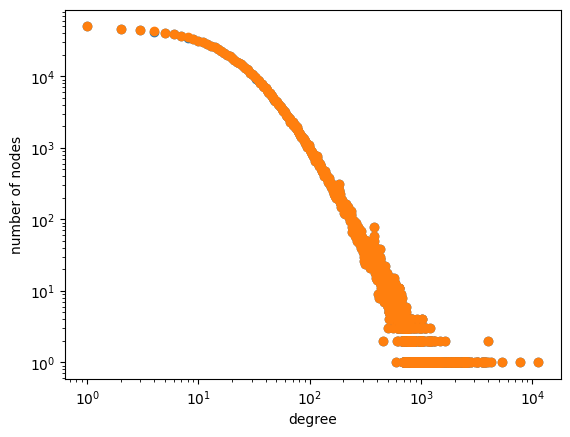

time: 1.04 s (started: 2024-10-15 10:37:04 +03:00)


In [83]:
dc=nk.centrality.DegreeCentrality(lcc)
dG=nk.centrality.DegreeCentrality(G)
dc.run()
dG.run()
dd = sorted(dc.scores(), reverse=True)
ddG=sorted(dG.scores(), reverse=True)
degrees, numberOfNodes = np.unique(dd, return_counts=True)
degreesG, numberOfNodesG = np.unique(ddG, return_counts=True)
plt.xscale("log")
plt.xlabel("degree")
plt.yscale("log")
plt.ylabel("number of nodes")
plt.scatter(degrees, numberOfNodes)
plt.scatter(degreesG, numberOfNodesG)
plt.show()

In [84]:
def avrg_nn_deg(G):
  q=[]
  for v in G.iterNodes():
    q.append(GLJ.degree(v))
  q.sort()
  q1=list(set(q))
  nn_deg={}
  for se in q1:
    nn_deg[se]=[]
  for v in G.iterNodes():
    sum=0
    for u in G.iterNeighbors(v):
      sum=sum+G.degree(u)
    fx=float(sum)/float(G.degree(v))
    nn_deg[G.degree(v)].append(fx)
  avg=[]
  for se in q1:
    avg.append(np.mean(np.array(nn_deg[se])))
  return q1, avg

time: 1.69 ms (started: 2024-10-15 10:37:22 +03:00)


In [87]:
q,avg=avrg_nn_deg(G)

time: 3.75 s (started: 2024-10-15 10:37:45 +03:00)


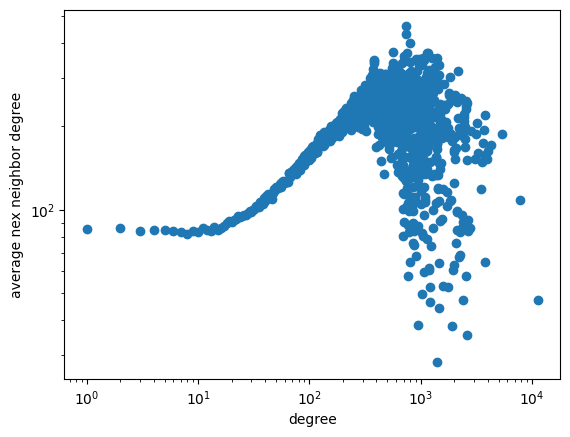

time: 302 ms (started: 2024-10-15 10:37:49 +03:00)


In [88]:
plt.xscale("log")
plt.xlabel("degree")
plt.yscale("log")
plt.ylabel("average nex neighbor degree")
plt.scatter(q,avg)
plt.show()

In [90]:
def node_clust(G,v):
  E=0
  if G.degree(v)>1:
    for u in G.iterNeighbors(v):
      for h in G.iterNeighbors(u):
        if G.hasEdge(v,h):
          E+=1
    c=(2.0*E)/(1.0*G.degree(v)*(G.degree(v)-1))
  else:
    c=0
  return c

time: 1.27 ms (started: 2024-10-15 10:38:16 +03:00)


In [93]:
ccl = nk.centrality.LocalClusteringCoefficient(G)
ccl.run()
l=ccl.ranking()

time: 5.72 s (started: 2024-10-15 10:38:27 +03:00)


In [95]:
def avrg_clust(G):
  q=[]
  for v in G.iterNodes():
    q.append(GLJ.degree(v))
  q.sort()
  q1=list(set(q))
  ccl = nk.centrality.LocalClusteringCoefficient(GLJ)
  ccl.run()
  l=ccl.ranking()
  nn_clust={}
  for se in q1:
    nn_clust[se]=[]
  for i in range(len(l)):
    v=l[i][0]
    q=G.degree(v)
    nn_clust[q].append(l[i][1])
  avgC=[]
  for se in q1:
    avgC.append(np.mean(np.array(nn_clust[se])))
  return q1, avgC

time: 1.76 ms (started: 2024-10-15 10:38:41 +03:00)


In [96]:
q,c=avrg_clust(G)

time: 6.36 s (started: 2024-10-15 10:38:47 +03:00)


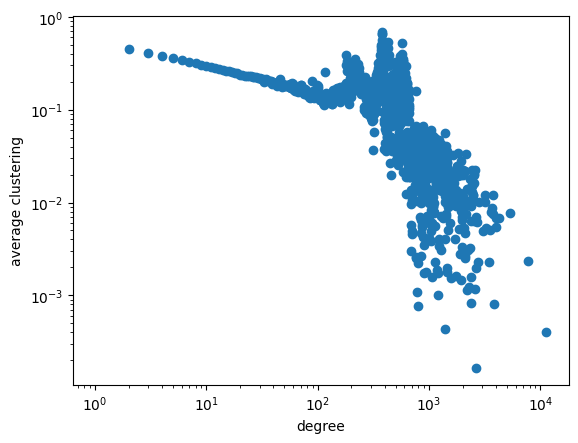

time: 369 ms (started: 2024-10-15 10:38:53 +03:00)


In [97]:
plt.xscale("log")
plt.xlabel("degree")
plt.yscale("log")
plt.ylabel("average clustering")
plt.scatter(q,c)
plt.show()

# Community detection algorithm

In [98]:
plm=nk.community.PLM(G, refine=False, gamma=0.1, maxIter=32, turbo=True, recurse=True)

time: 2.78 ms (started: 2024-10-15 10:39:00 +03:00)


In [99]:
plm.run()

time: 4.13 s (started: 2024-10-15 10:39:03 +03:00)


In [100]:
plmPartition = plm.getPartition()

time: 676 µs (started: 2024-10-15 10:39:09 +03:00)


In [102]:
type(plmPartition)

networkit.structures.Partition

time: 4.04 ms (started: 2024-10-15 10:39:27 +03:00)


In [104]:
plmPartition.numberOfSubsets()

1015

time: 32.3 ms (started: 2024-10-15 10:40:17 +03:00)


In [105]:
plpCommunities = nk.community.detectCommunities(G, algo=nk.community.PLP(GLJ))

Communities detected in 0.82471 [s]
solution properties:
-------------------  ---------------
# communities          2413
min community size        3
max community size   998466
avg. community size     442.545
imbalance              2253.87
edge cut             122326
edge cut (portion)        0.00750049
modularity                0.146185
-------------------  ---------------
time: 1.25 s (started: 2024-10-15 10:40:20 +03:00)


In [106]:
print("{0} elements assigned to {1} subsets".format(plpCommunities.numberOfElements(), plpCommunities.numberOfSubsets()))

1067862 elements assigned to 2413 subsets
time: 28.1 ms (started: 2024-10-15 10:40:25 +03:00)


In [107]:
plpCommunities1 = nk.community.detectCommunities(G, algo=nk.community.PLP(GLJ))

Communities detected in 0.79928 [s]
solution properties:
-------------------  ---------------
# communities          2432
min community size        3
max community size   999952
avg. community size     439.088
imbalance              2272.62
edge cut             121358
edge cut (portion)        0.00744114
modularity                0.144685
-------------------  ---------------
time: 1.22 s (started: 2024-10-15 10:40:26 +03:00)


In [108]:
plpCommunities.numberOfSubsets()

2413

time: 29.4 ms (started: 2024-10-15 10:40:31 +03:00)


In [109]:
plpCommunities1.numberOfSubsets()

2432

time: 30.5 ms (started: 2024-10-15 10:40:33 +03:00)


In [110]:
len(plpCommunities1.getVector())

1067862

time: 24.1 ms (started: 2024-10-15 10:40:36 +03:00)


In [111]:
plpCommunities1.getVector()[0:10]

[106, 106, 106, 106, 106, 106, 106, 106, 106, 106]

time: 21.1 ms (started: 2024-10-15 10:40:39 +03:00)


In [112]:
D=nk.community.AdjustedRandMeasure()

time: 628 µs (started: 2024-10-15 10:40:43 +03:00)


In [116]:
D.getDissimilarity(GLJ,plpCommunities,plpCommunities1)

0.005134566920921069

time: 32.7 ms (started: 2024-10-15 10:41:10 +03:00)


In [114]:
D.getDissimilarity(GLJ,plpCommunities,plmPartition)

0.16643029518053631

time: 31.3 ms (started: 2024-10-15 10:40:54 +03:00)


In [126]:
sizes1 = plpCommunities1.subsetSizes()
sizes1[1:10]

[65, 37, 999952, 18, 10, 73, 78, 4, 5]

time: 27.2 ms (started: 2024-10-15 10:44:00 +03:00)


In [127]:
sizes1.sort(reverse=True)
sizes1[1:10]

[11172, 1215, 851, 843, 822, 769, 603, 509, 502]

time: 3.38 ms (started: 2024-10-15 10:44:01 +03:00)


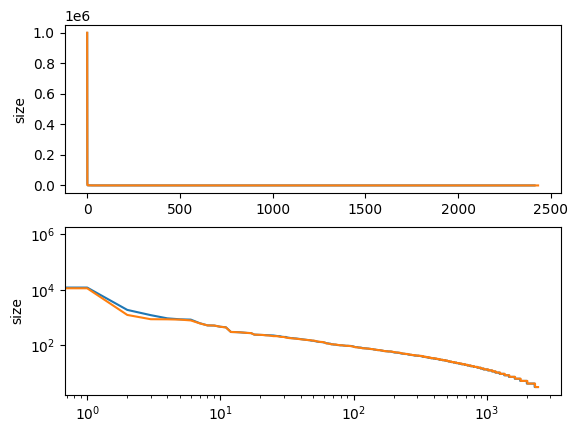

time: 346 ms (started: 2024-10-15 10:42:08 +03:00)


In [121]:
sizes = plpCommunities.subsetSizes()
sizes.sort(reverse=True)
sizes1 = plpCommunities1.subsetSizes()
sizes1.sort(reverse=True)
#sizes2 = plmPartition.subsetSizes()
#sizes2.sort(reverse=True)

ax1 = plt.subplot(2,1,1)
ax1.set_ylabel("size")
ax1.plot(sizes)
ax1.plot(sizes1)

ax2 = plt.subplot(2,1,2)
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_ylabel("size")
ax2.plot(sizes)
ax2.plot(sizes1)
plt.show()

In [154]:
from math import log

def mutual_info(c_A, c_B, S):
    N_mA = len(c_A)
    N_mB = len(c_B)
    I_num = 0
    for i in c_A:
        for j in c_B:
            n_i = len(c_A[i])
            n_j = len(c_B[j])
            n_ij = len(c_A[i] & c_B[j])
            if n_ij == 0:
                continue
            log_term = log((n_ij * S) / (n_i * n_j))

            I_num += n_ij * log_term
    I_num *= -2

    I_den = 0
    for i in c_A:
        n_i = len(c_A[i])
        I_den += n_i * log(n_i / S)

    for j in c_B:
        n_j = len(c_B[j])
        I_den += n_j * log(n_j / S)

    I = I_num / I_den
    return I

time: 2.06 ms (started: 2024-10-15 11:18:44 +03:00)


In [159]:
def vec_to_set(p,c):
  s=[]
  for se in p:
    s.append(se)
  s.sort()
  s1=list(set(s))
  cid={}
  for i in range(len(s1)):
    cid[s1[i]]=i
  gtc={}
  for i in range(0,c):
    gtc[i]=[]
  for j in range(len(p)):
    gtc[cid[p[j]]].append(j)
  for i in range(0,c):
    gtc[i]=set(gtc[i])
  return gtc

time: 2.07 ms (started: 2024-10-15 11:20:05 +03:00)


In [163]:
PLP1=vec_to_set(plpCommunities.getVector(),plpCommunities.numberOfSubsets())
PLP2=vec_to_set(plpCommunities1.getVector(),plpCommunities1.numberOfSubsets())
PLM=vec_to_set(plmPartition.getVector(),plmPartition.numberOfSubsets())

time: 784 ms (started: 2024-10-15 11:23:06 +03:00)


In [164]:
mutual_info(PLP1,PLP2,GLJ.numberOfNodes())

0.9580856689877754

time: 2.4 s (started: 2024-10-15 11:23:07 +03:00)


In [165]:
mutual_info(PLP1,PLM,G.numberOfNodes())

0.4695948645153199

time: 1.06 s (started: 2024-10-15 11:23:12 +03:00)


In [167]:
mutual_info(PLP2,PLM,G.numberOfNodes())

0.4659832404362076

time: 1.07 s (started: 2024-10-15 11:25:18 +03:00)


## Link prediction

Adamic/Adar Index

The Adamic/Adar Index predicts links in a graph according to the amount of shared links between two nodes. The index sums up the reciprocals of the logarithm of the degree of all common neighbors between two nodes u and v.

In [4]:
aai = nk.linkprediction.AdamicAdarIndex(G)

In [5]:
v=948498
u=36423

In [6]:
G.hasEdge(v,u)

False

In [7]:
aai.run(u,v)

0.0

Algebraic Distance Index

The Algebraic Distance Index assigns a distance value to pairs of nodes according to their structural closeness in the graph.

Preferential Attachment Index

The Preferential Attachment Index suggests that the more connected a node is, the more likely it is to receive new links.

In [8]:
pai = nk.linkprediction.PreferentialAttachmentIndex(G)

# Calculate the preferential attachment index between two nodes
pai.run(u, v)

28.0

## Link sampling and link prediction

In [ ]:
trainingGraph = nk.linkprediction.RandomLinkSampler.byPercentage(G, 0.7)

# Find missing links
missingLinks = nk.linkprediction.MissingLinksFinder(trainingGraph).findAtDistance(5)

# Run link prediticion
predictions = nk.linkprediction.KatzIndex(G).runOn(missingLinks)

# Print the first 5 predictions
for p in predictions[:5]:
    print(p)